## CC_FRAUD with Normal Approaches

### Load Packages

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

### Read Data

In [48]:
df = pd.read_csv("CC_FRAUD.csv")

### Glimse of data

In [49]:
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0


In [50]:
df.shape

(94682, 20)

In [51]:
df["TRN_TYPE"].value_counts()

0    92588
1     2094
Name: TRN_TYPE, dtype: int64

### Credit card Fraud- data unbalance

/home/abhigyan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')]

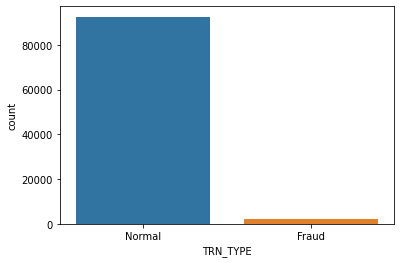

In [52]:
graph = sns.countplot(df["TRN_TYPE"],data=df)
graph.set_xticklabels(["Normal","Fraud"])

### check for missing values

<AxesSubplot:>

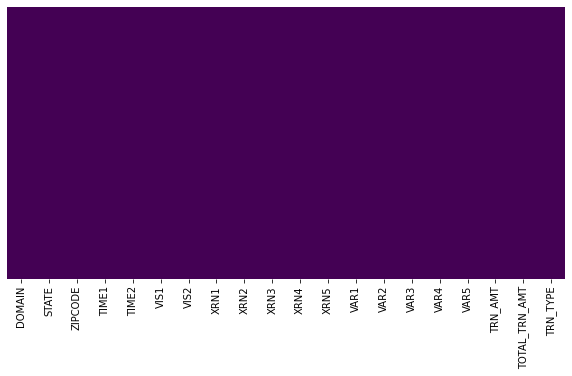

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [54]:
target = df["TRN_TYPE"]

In [55]:
target

0        0
1        0
2        0
3        0
4        0
        ..
94677    0
94678    0
94679    0
94680    0
94681    0
Name: TRN_TYPE, Length: 94682, dtype: int64

In [56]:
df= df.drop(["DOMAIN","STATE","ZIPCODE","TRN_TYPE"],axis=1)

In [57]:
df.head()

,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
0,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95
1,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85
2,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85
3,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01
4,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95


## splitting data in train and test sets

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=42)

In [59]:
x_test.shape

(28405, 16)

In [60]:
x_train.shape

(66277, 16)

In [61]:
y_test.value_counts()

0    27769
1      636
Name: TRN_TYPE, dtype: int64

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=42, shuffle=True) 

results = cross_validate(estimator=rf,
                                          X=df,
                                          y=target,
                                          cv=kfold,
                                          scoring=scoring)

In [64]:
results

{'fit_time': array([19.9848485 , 26.70256829, 30.50680065, 18.54716539, 17.15299511,
        18.40166163, 18.69544458, 16.6501472 , 16.75954366, 13.68109894]),
 'score_time': array([0.40140533, 0.77573514, 0.820997  , 0.38214159, 0.30597138,
        0.64431   , 0.27229428, 0.27728701, 0.26085901, 0.32042241]),
 'test_accuracy': array([0.97518217, 0.97771676, 0.9765526 , 0.97803126, 0.97623574,
        0.97623574, 0.97697507, 0.97887621, 0.97739755, 0.9748627 ]),
 'test_precision': array([0.24137931, 0.19047619, 0.40909091, 0.46428571, 0.22727273,
        0.14285714, 0.25      , 0.38888889, 0.26315789, 0.17241379]),
 'test_recall': array([0.03181818, 0.02020202, 0.0412844 , 0.0631068 , 0.02347418,
        0.00930233, 0.03431373, 0.03571429, 0.02439024, 0.02283105]),
 'test_f1_score': array([0.0562249 , 0.03652968, 0.075     , 0.11111111, 0.04255319,
        0.01746725, 0.06034483, 0.06542056, 0.04464286, 0.04032258])}

In [65]:
precision = np.mean(results['test_precision'])
precision
np.mean(results['test_recall'])

0.030643721112681422

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9768350642492519
[[27729    40]
 [  618    18]]
              precision    recall  f1-score   support

           0     0.9782    0.9986    0.9883     27769
           1     0.3103    0.0283    0.0519       636

    accuracy                         0.9768     28405
   macro avg     0.6443    0.5134    0.5201     28405
weighted avg     0.9632    0.9768    0.9673     28405



## AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42,algorithm='SAMME.R',
                         learning_rate=0.8,)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [69]:
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9776095757789122
[[27769     0]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    1.0000    0.9887     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9776     28405
   macro avg     0.4888    0.5000    0.4943     28405
weighted avg     0.9557    0.9776    0.9665     28405



/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.977222320014082
[[27758    11]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    0.9996    0.9885     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9772     28405
   macro avg     0.4888    0.4998    0.4942     28405
weighted avg     0.9557    0.9772    0.9663     28405



## XG Boost

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:00:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9775039605703221
[[27762     7]
 [  632     4]]
              precision    recall  f1-score   support

           0     0.9777    0.9997    0.9886     27769
           1     0.3636    0.0063    0.0124       636

    accuracy                         0.9775     28405
   macro avg     0.6707    0.5030    0.5005     28405
weighted avg     0.9640    0.9775    0.9668     28405



## Under Sampling

In [74]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [75]:
us = NearMiss(sampling_strategy=0.8)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_us)))

The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 1822, 1: 1458})


## Rf with US

In [76]:
rf.fit(x_train_us,y_train_us)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.21450448864636507
[[ 5598 22171]
 [  141   495]]
              precision    recall  f1-score   support

           0     0.9754    0.2016    0.3341     27769
           1     0.0218    0.7783    0.0425       636

    accuracy                         0.2145     28405
   macro avg     0.4986    0.4899    0.1883     28405
weighted avg     0.9541    0.2145    0.3276     28405



## Ada with US

In [77]:
ada.fit(x_train_us,y_train_us)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.3014258053159655
[[ 8147 19622]
 [  221   415]]
              precision    recall  f1-score   support

           0     0.9736    0.2934    0.4509     27769
           1     0.0207    0.6525    0.0401       636

    accuracy                         0.3014     28405
   macro avg     0.4972    0.4730    0.2455     28405
weighted avg     0.9523    0.3014    0.4417     28405



## GB with US

In [78]:
gb.fit(x_train_us,y_train_us)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.27410667136067596
[[ 7352 20417]
 [  202   434]]
              precision    recall  f1-score   support

           0     0.9733    0.2648    0.4163     27769
           1     0.0208    0.6824    0.0404       636

    accuracy                         0.2741     28405
   macro avg     0.4970    0.4736    0.2283     28405
weighted avg     0.9519    0.2741    0.4079     28405



## XGB with US

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_us,y_train_us)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:01:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.2145396937158951
[[ 5601 22168]
 [  143   493]]
              precision    recall  f1-score   support

           0     0.9751    0.2017    0.3343     27769
           1     0.0218    0.7752    0.0423       636

    accuracy                         0.2145     28405
   macro avg     0.4984    0.4884    0.1883     28405
weighted avg     0.9538    0.2145    0.3277     28405



## Over Sampling

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
os = RandomOverSampler(sampling_strategy=0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_os)))

The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 64819, 1: 48614})


## Rf with OS

In [82]:
rf.fit(x_train_os,y_train_os)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9749339904946313
[[27663   106]
 [  606    30]]
              precision    recall  f1-score   support

           0     0.9786    0.9962    0.9873     27769
           1     0.2206    0.0472    0.0777       636

    accuracy                         0.9749     28405
   macro avg     0.5996    0.5217    0.5325     28405
weighted avg     0.9616    0.9749    0.9669     28405



## Ada with OS

In [83]:
ada.fit(x_train_os,y_train_os)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9520154902305932
[[27011   758]
 [  605    31]]
              precision    recall  f1-score   support

           0     0.9781    0.9727    0.9754     27769
           1     0.0393    0.0487    0.0435       636

    accuracy                         0.9520     28405
   macro avg     0.5087    0.5107    0.5094     28405
weighted avg     0.9571    0.9520    0.9545     28405



## Gb with OS

In [84]:
gb.fit(x_train_os,y_train_os)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9563457137827848
[[27124   645]
 [  595    41]]
              precision    recall  f1-score   support

           0     0.9785    0.9768    0.9777     27769
           1     0.0598    0.0645    0.0620       636

    accuracy                         0.9563     28405
   macro avg     0.5192    0.5206    0.5198     28405
weighted avg     0.9580    0.9563    0.9572     28405



## XG boost with OS

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_os,y_train_os)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:02:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9004048582995952
[[25473  2296]
 [  533   103]]
              precision    recall  f1-score   support

           0     0.9795    0.9173    0.9474     27769
           1     0.0429    0.1619    0.0679       636

    accuracy                         0.9004     28405
   macro avg     0.5112    0.5396    0.5076     28405
weighted avg     0.9585    0.9004    0.9277     28405



## SMOTETomek

In [86]:
from imblearn.combine import SMOTETomek

In [87]:
sm = SMOTETomek()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_sm)))

The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 64712, 1: 64712})


In [88]:
Counter(y_test)

Counter({0: 27769, 1: 636})

## Rf with SMOTETomek

In [89]:
rf.fit(x_train_sm,y_train_sm)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9386375638091885
[[26620  1149]
 [  594    42]]
              precision    recall  f1-score   support

           0     0.9782    0.9586    0.9683     27769
           1     0.0353    0.0660    0.0460       636

    accuracy                         0.9386     28405
   macro avg     0.5067    0.5123    0.5071     28405
weighted avg     0.9571    0.9386    0.9476     28405



## Ada with SMOTETomek

In [90]:
ada.fit(x_train_sm,y_train_sm)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7255412779440239
[[20413  7356]
 [  440   196]]
              precision    recall  f1-score   support

           0     0.9789    0.7351    0.8397     27769
           1     0.0260    0.3082    0.0479       636

    accuracy                         0.7255     28405
   macro avg     0.5024    0.5216    0.4438     28405
weighted avg     0.9576    0.7255    0.8219     28405



## Gb with SMOTETomek

In [91]:
gb.fit(x_train_sm,y_train_sm)
y_pred = gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.739940151381799
[[20844  6925]
 [  462   174]]
              precision    recall  f1-score   support

           0     0.9783    0.7506    0.8495     27769
           1     0.0245    0.2736    0.0450       636

    accuracy                         0.7399     28405
   macro avg     0.5014    0.5121    0.4472     28405
weighted avg     0.9570    0.7399    0.8315     28405



## XGB with SMOTETomek

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_sm,y_train_sm)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:11:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8302763597958106
[[23465  4304]
 [  517   119]]
              precision    recall  f1-score   support

           0     0.9784    0.8450    0.9068     27769
           1     0.0269    0.1871    0.0470       636

    accuracy                         0.8303     28405
   macro avg     0.5027    0.5161    0.4769     28405
weighted avg     0.9571    0.8303    0.8876     28405

